In [9]:
import pandas as pd
import numpy as np
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from imblearn.over_sampling import RandomOverSampler
from sklearn.metrics import confusion_matrix
from imblearn.under_sampling import RandomUnderSampler

In [10]:
df = pd.read_csv('Training Data.csv')
df.drop(['Id', 'CITY'], axis = 1, inplace = True)
df.head()

,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
0,1303834,23,3,single,rented,no,Mechanical_engineer,Madhya_Pradesh,3,13,0
1,7574516,40,10,single,rented,no,Software_Developer,Maharashtra,9,13,0
2,3991815,66,4,married,rented,no,Technical_writer,Kerala,4,10,0
3,6256451,41,2,single,rented,yes,Software_Developer,Odisha,2,12,1
4,5768871,47,11,single,rented,no,Civil_servant,Tamil_Nadu,3,14,1


In [11]:
label_encoders = {}
for column in df.select_dtypes(include=['category']).columns:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le
    
print(df.head())

    Income  Age  Experience Married/Single House_Ownership Car_Ownership  \
0  1303834   23           3         single          rented            no   
1  7574516   40          10         single          rented            no   
2  3991815   66           4        married          rented            no   
3  6256451   41           2         single          rented           yes   
4  5768871   47          11         single          rented            no   

            Profession           STATE  CURRENT_JOB_YRS  CURRENT_HOUSE_YRS  \
0  Mechanical_engineer  Madhya_Pradesh                3                 13   
1   Software_Developer     Maharashtra                9                 13   
2     Technical_writer          Kerala                4                 10   
3   Software_Developer          Odisha                2                 12   
4        Civil_servant      Tamil_Nadu                3                 14   

   Risk_Flag  
0          0  
1          0  
2          0  
3          1  

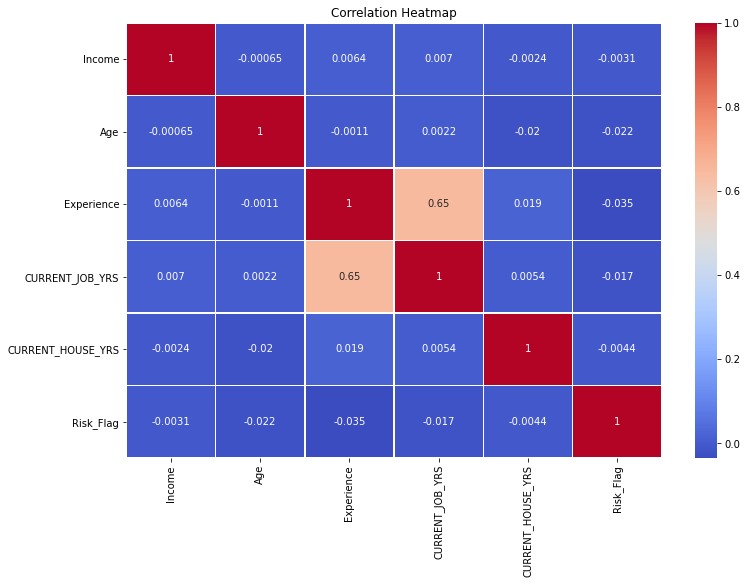

In [12]:
# Plot a heatmap
plt.figure(figsize=(12, 8))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

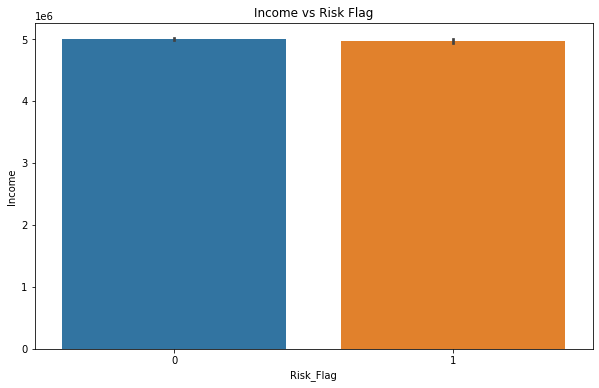

In [5]:
plt.figure(figsize=(10, 6))
sns.barplot(data=df, x='Risk_Flag', y='Income')
plt.title('Income vs Risk Flag')
plt.show()

<AxesSubplot:xlabel='Risk_Flag', ylabel='CURRENT_JOB_YRS'>

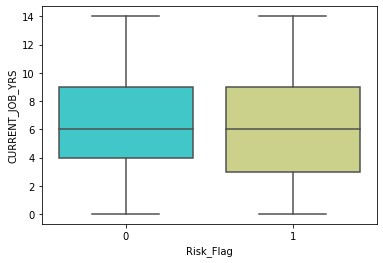

In [13]:
sns.boxplot(x = 'Risk_Flag',y = 'CURRENT_JOB_YRS',palette = 'rainbow',data= df)

<Figure size 1080x720 with 0 Axes>

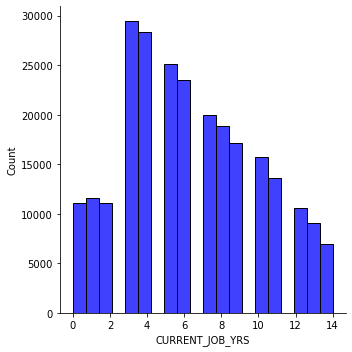

In [23]:
plt.figure(figsize = (15,10))
sns.displot(df['CURRENT_JOB_YRS'],bins=20,color='b')

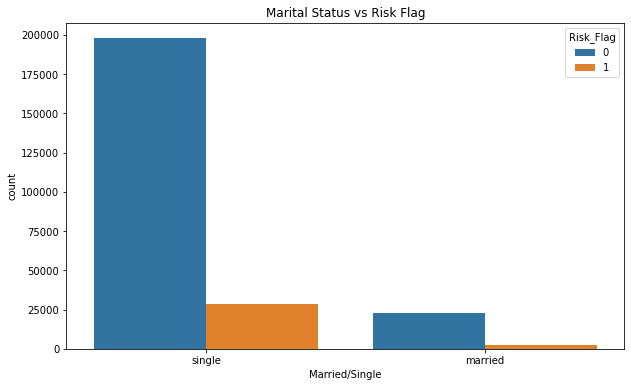

In [6]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Married/Single', hue='Risk_Flag')
plt.title('Marital Status vs Risk Flag')
plt.show()

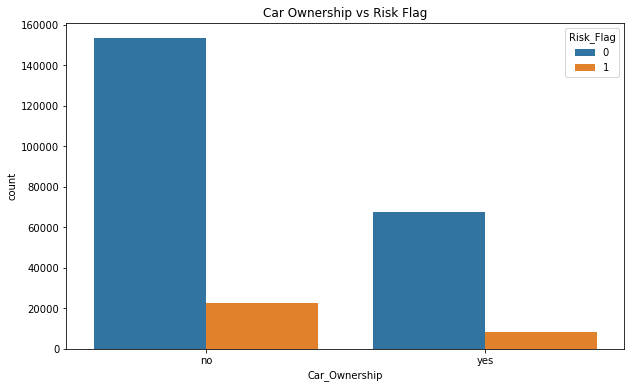

In [7]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Car_Ownership', hue='Risk_Flag')
plt.title('Car Ownership vs Risk Flag')
plt.show()

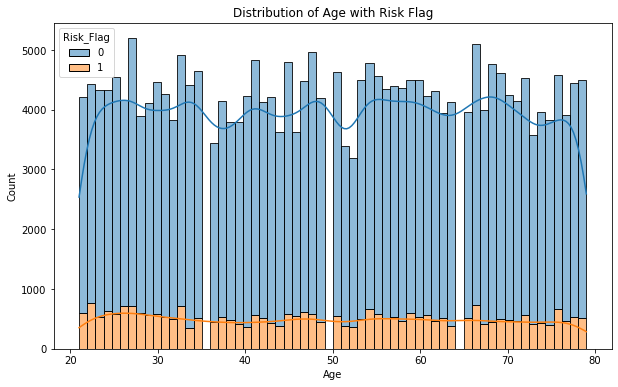

In [8]:
plt.figure(figsize=(10, 6))
sns.histplot(df, x='Age', hue='Risk_Flag', multiple='stack', kde=True)
plt.title('Distribution of Age with Risk Flag')
plt.show()

In [10]:
prof = {}
state = {}

for i, j in enumerate(list(df.groupby('Profession')['Income'].mean().sort_values(ascending = False).index)):
    prof[j] = i


for i, j in enumerate(list(df.groupby('STATE')['Income'].mean().sort_values(ascending = False).index)):
    state[j] = i

df['Married/Single'] = df['Married/Single'].replace({'single': 0, 'married': 1})
df['Car_Ownership'] = df['Car_Ownership'].replace({'no': 0, 'yes': 1})
df['Profession'] = df['Profession'].replace(prof)
df['STATE'] = df['STATE'].replace(state)
df = pd.get_dummies(df, columns=['House_Ownership'])

print(df.shape)
df.head()

(252000, 13)


,Income,Age,Experience,Married/Single,Car_Ownership,Profession,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag,House_Ownership_norent_noown,House_Ownership_owned,House_Ownership_rented
0,1303834,23,3,0,0,7,17,3,13,0,0,0,1
1,7574516,40,10,0,0,39,11,9,13,0,0,0,1
2,3991815,66,4,1,0,33,2,4,10,0,0,0,1
3,6256451,41,2,0,1,39,15,2,12,1,0,0,1
4,5768871,47,11,0,0,32,10,3,14,1,0,0,1


In [11]:
ros = RandomOverSampler(random_state=42)
X = df.drop('Risk_Flag', axis=1)
y = df['Risk_Flag']
X_res, y_res = ros.fit_resample(X, y)
print(X_res.shape, X.shape)

(442008, 12) (252000, 12)


In [12]:
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.2, random_state=42)

rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

xgb = XGBClassifier(random_state=42)
xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_test)

In [13]:
print("Random Forest Metrics:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_rf):.2f}")
print(f"Precision: {precision_score(y_test, y_pred_rf):.2f}")
print(f"Recall: {recall_score(y_test, y_pred_rf):.2f}")
print(f"F1-Score: {f1_score(y_test, y_pred_rf):.2f}")

print("\nXGBoost Metrics:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_xgb):.2f}")
print(f"Precision: {precision_score(y_test, y_pred_xgb):.2f}")
print(f"Recall: {recall_score(y_test, y_pred_xgb):.2f}")
print(f"F1-Score: {f1_score(y_test, y_pred_xgb):.2f}")

Random Forest Metrics:
Accuracy: 0.96
Precision: 0.92
Recall: 1.00
F1-Score: 0.96

XGBoost Metrics:
Accuracy: 0.85
Precision: 0.85
Recall: 0.85
F1-Score: 0.85


In [14]:
# Calculate the confusion matrix
confusion_matrixa = confusion_matrix(y_test, y_pred_xgb)

# Print the confusion matrix
print(confusion_matrixa)


[[37913  6410]
 [ 6490 37589]]


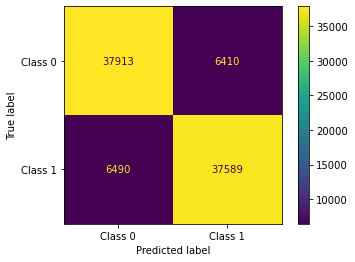

In [15]:
from sklearn.metrics import ConfusionMatrixDisplay

# Create the ConfusionMatrixDisplay object
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrixa)

# Customize the display (optional)
disp.display_labels = ['Class 0', 'Class 1']  # Set class labels

# Plot the confusion matrix
disp.plot(cmap = 'viridis')
plt.show()

Random Forest Metrics (Training):
Accuracy: 0.96
Precision: 0.92
Recall: 1.00
F1-Score: 0.96

Random Forest Metrics (Testing):
Accuracy: 0.96
Precision: 0.92
Recall: 1.00
F1-Score: 0.96

XGBoost Metrics (Training):
Accuracy: 0.86
Precision: 0.86
Recall: 0.86
F1-Score: 0.86

XGBoost Metrics (Testing):
Accuracy: 0.85
Precision: 0.85
Recall: 0.85
F1-Score: 0.85


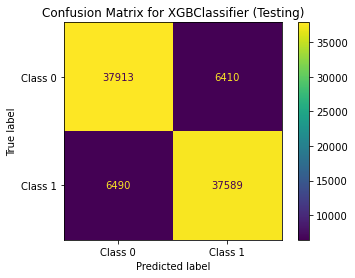

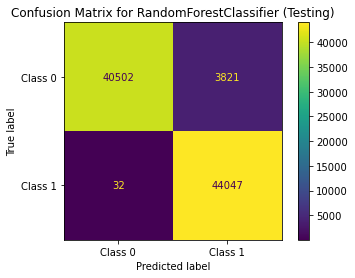

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
from imblearn.over_sampling import RandomOverSampler

# Load the data
df = pd.read_csv('Training Data.csv')
df.drop(['Id', 'CITY'], axis=1, inplace=True)

# Encode categorical variables
label_encoders = {}
for column in df.select_dtypes(include=['category']).columns:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le

# Encode more categorical variables
prof = {}
state = {}
for i, j in enumerate(list(df.groupby('Profession')['Income'].mean().sort_values(ascending=False).index)):
    prof[j] = i
for i, j in enumerate(list(df.groupby('STATE')['Income'].mean().sort_values(ascending=False).index)):
    state[j] = i

df['Married/Single'] = df['Married/Single'].replace({'single': 0, 'married': 1})
df['Car_Ownership'] = df['Car_Ownership'].replace({'no': 0, 'yes': 1})
df['Profession'] = df['Profession'].replace(prof)
df['STATE'] = df['STATE'].replace(state)
df = pd.get_dummies(df, columns=['House_Ownership'])

# Oversample the minority class
ros = RandomOverSampler(random_state=42)
X = df.drop('Risk_Flag', axis=1)
y = df['Risk_Flag']
X_res, y_res = ros.fit_resample(X, y)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.2, random_state=42)

# Train RandomForestClassifier
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
y_train_pred_rf = rf.predict(X_train)
y_test_pred_rf = rf.predict(X_test)

# Train XGBClassifier
xgb = XGBClassifier(random_state=42)
xgb.fit(X_train, y_train)
y_train_pred_xgb = xgb.predict(X_train)
y_test_pred_xgb = xgb.predict(X_test)

# Print metrics for RandomForestClassifier
print("Random Forest Metrics (Training):")
print(f"Accuracy: {accuracy_score(y_train, y_train_pred_rf):.2f}")
print(f"Precision: {precision_score(y_train, y_train_pred_rf):.2f}")
print(f"Recall: {recall_score(y_train, y_train_pred_rf):.2f}")
print(f"F1-Score: {f1_score(y_train, y_train_pred_rf):.2f}")

print("\nRandom Forest Metrics (Testing):")
print(f"Accuracy: {accuracy_score(y_test, y_test_pred_rf):.2f}")
print(f"Precision: {precision_score(y_test, y_test_pred_rf):.2f}")
print(f"Recall: {recall_score(y_test, y_test_pred_rf):.2f}")
print(f"F1-Score: {f1_score(y_test, y_test_pred_rf):.2f}")

# Print metrics for XGBClassifier
print("\nXGBoost Metrics (Training):")
print(f"Accuracy: {accuracy_score(y_train, y_train_pred_xgb):.2f}")
print(f"Precision: {precision_score(y_train, y_train_pred_xgb):.2f}")
print(f"Recall: {recall_score(y_train, y_train_pred_xgb):.2f}")
print(f"F1-Score: {f1_score(y_train, y_train_pred_xgb):.2f}")

print("\nXGBoost Metrics (Testing):")
print(f"Accuracy: {accuracy_score(y_test, y_test_pred_xgb):.2f}")
print(f"Precision: {precision_score(y_test, y_test_pred_xgb):.2f}")
print(f"Recall: {recall_score(y_test, y_test_pred_xgb):.2f}")
print(f"F1-Score: {f1_score(y_test, y_test_pred_xgb):.2f}")

# Calculate and plot confusion matrix for XGBClassifier (Testing)
confusion_matrix_xgb_test = confusion_matrix(y_test, y_test_pred_xgb)
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix_xgb_test)
disp.display_labels = ['Class 0', 'Class 1']
disp.plot(cmap='viridis')
plt.title('Confusion Matrix for XGBClassifier (Testing)')
plt.show()

# Calculate and plot confusion matrix for RandomForestClassifier (Testing)
confusion_matrix_rf_test = confusion_matrix(y_test, y_test_pred_rf)
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix_rf_test)
disp.display_labels = ['Class 0', 'Class 1']
disp.plot(cmap='viridis')
plt.title('Confusion Matrix for RandomForestClassifier (Testing)')
plt.show()
